##IMPORT DEI DATASET E DELLE LIBRERIE + COSTRUZIONE DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/Fake_news_rid.csv
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/True_news_rid.csv

--2022-04-30 06:49:23--  https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/Fake_news_rid.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.148.94
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.148.94|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23875091 (23M) [text/csv]
Saving to: ‘Fake_news_rid.csv’

Fake_news_rid.csv   100%[===================>]  22.77M  79.1MB/s    in 0.3s    

2022-04-30 06:49:23 (79.1 MB/s) - ‘Fake_news_rid.csv’ saved [23875091/23875091]

--2022-04-30 06:49:23--  https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/True_news_rid.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.148.94
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.148.94|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23478117 (22M) [text/csv]
Saving t

In [3]:
fake_df = pd.read_csv('Fake_news_rid.csv')
fake_df

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
8745,The NY Daily News Has Just LITERALLY Told Ted...,"If there s one thing you never do in life, it ...",News,"January 15, 2016"
8746,RNC Leader’s Backstage Rant Shows What The GO...,Footage has been released of a leader of the R...,News,"January 15, 2016"
8747,U.S. Air Force Advertises Martin Luther King ...,Put this one under Shit You Just Can t Make U...,News,"January 15, 2016"
8748,The Winner Of The GOP Debate Is…Bernie Sander...,If a debate is won according to who generates ...,News,"January 15, 2016"


In [4]:
fake_df.insert(2, 'target', 0, allow_duplicates=False)
fake_df

,title,text,target,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0,News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0,News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0,News,"December 25, 2017"
...,...,...,...,...,...
8745,The NY Daily News Has Just LITERALLY Told Ted...,"If there s one thing you never do in life, it ...",0,News,"January 15, 2016"
8746,RNC Leader’s Backstage Rant Shows What The GO...,Footage has been released of a leader of the R...,0,News,"January 15, 2016"
8747,U.S. Air Force Advertises Martin Luther King ...,Put this one under Shit You Just Can t Make U...,0,News,"January 15, 2016"
8748,The Winner Of The GOP Debate Is…Bernie Sander...,If a debate is won according to who generates ...,0,News,"January 15, 2016"


In [5]:
true_df = pd.read_csv('True_news_rid.csv')
true_df

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
8745,White House hopeful Trump nears end of vice pr...,WASHINGTON (Reuters) - Republican Donald Trump...,politicsNews,"July 13, 2016"
8746,"Republicans, Democrats sharply divided over Mu...",NEW YORK (Reuters) - Many Americans view Islam...,politicsNews,"July 15, 2016"
8747,House Speaker Ryan on Pence: 'No better choice',WASHINGTON (Reuters) - U.S. House of Represent...,politicsNews,"July 15, 2016"
8748,Trump's expected VP pick: coal advocate who de...,WASHINGTON/NEW YORK (Reuters) - Republican Don...,politicsNews,"July 14, 2016"


In [6]:
true_df.insert(2, 'target', 1, allow_duplicates=False)

true_df

,title,text,target,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,1,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,1,politicsNews,"December 29, 2017"
...,...,...,...,...,...
8745,White House hopeful Trump nears end of vice pr...,WASHINGTON (Reuters) - Republican Donald Trump...,1,politicsNews,"July 13, 2016"
8746,"Republicans, Democrats sharply divided over Mu...",NEW YORK (Reuters) - Many Americans view Islam...,1,politicsNews,"July 15, 2016"
8747,House Speaker Ryan on Pence: 'No better choice',WASHINGTON (Reuters) - U.S. House of Represent...,1,politicsNews,"July 15, 2016"
8748,Trump's expected VP pick: coal advocate who de...,WASHINGTON/NEW YORK (Reuters) - Republican Don...,1,politicsNews,"July 14, 2016"


In [7]:
#concatenazione dataset per crearne uno unico

lista_df = [fake_df, true_df]
df = pd.concat(lista_df, ignore_index=True)
df

,title,text,target,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0,News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0,News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0,News,"December 25, 2017"
...,...,...,...,...,...
17495,White House hopeful Trump nears end of vice pr...,WASHINGTON (Reuters) - Republican Donald Trump...,1,politicsNews,"July 13, 2016"
17496,"Republicans, Democrats sharply divided over Mu...",NEW YORK (Reuters) - Many Americans view Islam...,1,politicsNews,"July 15, 2016"
17497,House Speaker Ryan on Pence: 'No better choice',WASHINGTON (Reuters) - U.S. House of Represent...,1,politicsNews,"July 15, 2016"
17498,Trump's expected VP pick: coal advocate who de...,WASHINGTON/NEW YORK (Reuters) - Republican Don...,1,politicsNews,"July 14, 2016"


In [8]:
pd.unique(df['target'])

array([0, 1])

In [9]:
df['text'].to_list()

Output hidden; open in https://colab.research.google.com to view.

In [10]:
df['text'].isnull().sum()

0

##Data Cleaning

In [11]:
def clean_special_patterns(text):
    """Remove special patterns - email, url, date etc."""
    html_regex = re.compile(r"<.*?>")
    email_regex = re.compile(r"[\w.-]+@[\w.-]+")
    url_regex = re.compile(r"(http|www)[^\s]+")
    date_regex = re.compile(r"[\d]{2,4}[ -/:]*[\d]{2,4}([ -/:]*[\d]{2,4})?") # a way to match date
    new_line = re.compile(r"/(\r\n)+|\r+|\n+|\t+/")
    number = re.compile(r"[\d+]")
    under = re.compile(r"[^a-zA-Z0-9:$-,%.?!]+")
    simbols = re.compile(r"[^\w\s/'/`]")
    spaces = re.compile(r"\s{2,}")
    remove_singlelett= re.compile(r"(^| ).( |$)")

    ## remove
    text = text.lower()
    text = number.sub(" ", text)
    text = html_regex.sub(" ", text)
    text = url_regex.sub(" ", text)
    text = email_regex.sub(" ", text)
    text = date_regex.sub(" ", text)
    text = new_line.sub(" ", text)
    text = under.sub(" ", text)
    text = simbols.sub(" ", text)
    text = spaces.sub(" ", text)
    text = text.replace("`", "'")
    text = remove_singlelett.sub("",text)
    return text

In [12]:
#elimino le colonne che non mi interessano

df = df[['text', 'target']]
df

,text,target
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
17495,WASHINGTON (Reuters) - Republican Donald Trump...,1
17496,NEW YORK (Reuters) - Many Americans view Islam...,1
17497,WASHINGTON (Reuters) - U.S. House of Represent...,1
17498,WASHINGTON/NEW YORK (Reuters) - Republican Don...,1


In [13]:
df['text'] = df['text'].apply(clean_special_patterns)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,target
0,donald trump just couldnwish all americanshapp...,0
1,house intelligence committee chairman devin nu...,0
2,on friday it was revealed that former milwauke...,0
3,on christmas day donald trump announced that h...,0
4,pope francis used his annual christmas day mes...,0
...,...,...
17495,washington reuters republican donald trump nea...,1
17496,new york reuters many americans view islam unf...,1
17497,washington reuterss house of representatives s...,1
17498,washington new york reuters republican donald ...,1


##STOPWORDS + LEMMATIZATION SpaCy

In [14]:
#SpaCy Custom Pipeline

import multiprocessing as mp

import string
import spacy 
from sklearn.base import TransformerMixin, BaseEstimator


nlp = spacy.load("en_core_web_sm")

class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self,
                 nlp = nlp,
                 n_jobs=1):
        """
        Text preprocessing transformer includes steps:
            1. Punctuation removal
            2. Stop words removal
            3. Lemmatization

        nlp  - spacy model
        n_jobs - parallel jobs to run
        """
        self.nlp = nlp
        self.n_jobs = n_jobs

    def fit(self, X, y=None):
        return self

    def transform(self, X, *_):
        X_copy = X.copy()

        partitions = 1
        cores = mp.cpu_count()
        if self.n_jobs <= -1:
            partitions = cores
        elif self.n_jobs <= 0:
            return X_copy.apply(self._preprocess_text)
        else:
            partitions = min(self.n_jobs, cores)

        data_split = np.array_split(X_copy, partitions)
        pool = mp.Pool(cores)
        data = pd.concat(pool.map(self._preprocess_part, data_split))
        pool.close()
        pool.join()

        return data

    def _preprocess_part(self, part):
        return part.apply(self._preprocess_text)

    def _remove_punct(self, doc):
        return (t for t in doc if t.text not in string.punctuation)

    def _remove_stop_words(self, doc):
        return (t for t in doc if not t.is_stop)

    def _lemmatize(self, doc):
        return ' '.join(t.lemma_ for t in doc)

    def _preprocess_text(self, text):
      doc = self.nlp(text)
      removed_punct = self._remove_punct(doc)
      removed_stop_words = self._remove_stop_words(removed_punct)
      return self._lemmatize(removed_stop_words)

In [15]:
text_preprocess = TextPreprocessor(n_jobs=-1)._preprocess_text
df['text'] = df['text'].apply(text_preprocess)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,target
0,donald trump couldnwish americanshappy new yea...,0
1,house intelligence committee chairman devin nu...,0
2,friday reveal milwaukee sheriff david clarke c...,0
3,christmas day donald trump announce work follo...,0
4,pope francis annual christmas day message rebu...,0
...,...,...
17495,washington reuters republican donald trump nea...,1
17496,new york reuter americans view islam unfavorab...,1
17497,washington reuterss house representatives spea...,1
17498,washington new york reuters republican donald ...,1


##EDA

In [16]:
cleaned = ' '.join(df['text'].to_list())

(-0.5, 799.5, 399.5, -0.5)

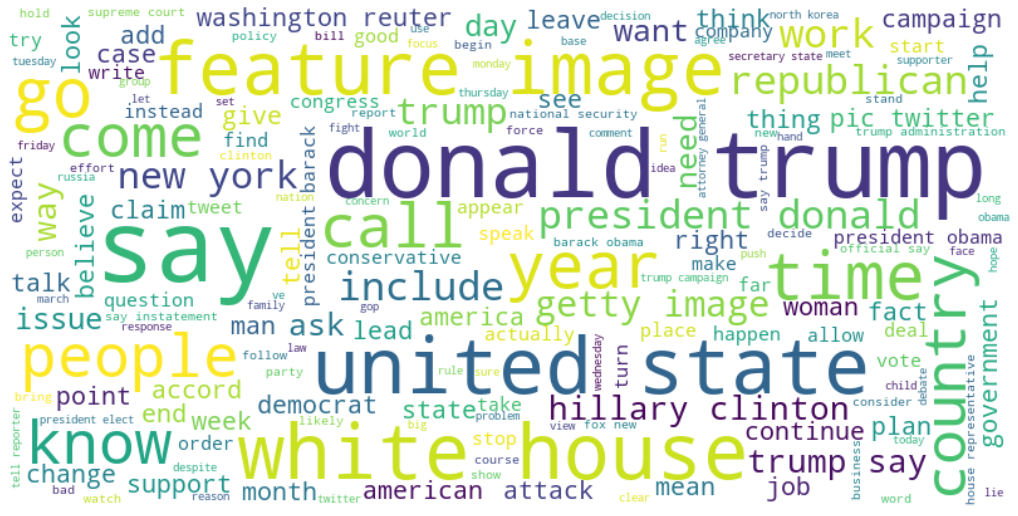

In [17]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 800, height = 400,
                      max_words = 180, contour_width = 3,
                      max_font_size = 80, contour_color = 'steelblue',
                      random_state = 667)

wordcloud.generate(cleaned)

plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

##BOW+TFIDF

In [18]:
X_ = df['text']
y = df['target']

In [ ]:
#Uso TfidfVectorizer per fare BOW e TFIDF insieme

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X_).toarray()
X

##TRAIN/TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_, y,
                                                    test_size=0.25, 
                                                    random_state=667
                                                    )

In [ ]:
labels = ['Fake', 'True']

##MODEL FIT

RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=1000, random_state=667,max_depth=5)
classifier.fit(X_train, y_train) 

In [ ]:
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

In [ ]:
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = labels, 
            yticklabels = labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [ ]:
from sklearn.metrics import classification_report
#labels = ['class1', 'class2']
print(classification_report(y_test, y_pred, target_names=labels))

In [ ]:
!pip install plot-metric --quiet

In [ ]:
from plot_metric.functions import BinaryClassification

In [ ]:
from plot_metric.functions import BinaryClassification
y_pred_proba = classifier.predict_proba(X_test)[::,1]

#labels = ['class1', 'class2']
bc = BinaryClassification(y_test, y_pred_proba, labels=labels)

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve();

MultinomialNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

In [ ]:
from sklearn.metrics import classification_report
#labels = ['class1', 'class2']
print(classification_report(y_test, y_pred, target_names=labels))

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = labels, 
            yticklabels = labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [ ]:
y_pred_proba = classifier.predict_proba(X_test)[::,1]

#labels = ['class1', 'class2']
bc = BinaryClassification(y_test, y_pred_proba, labels=labels)

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve();

SGDClassifier

In [ ]:
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier(loss='log', penalty='l2',alpha=1e-3, random_state=667, max_iter=5, tol=None)
classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = labels, 
            yticklabels = labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [ ]:
from sklearn.metrics import classification_report
#labels = ['class1', 'class2']
print(classification_report(y_test, y_pred, target_names=labels))

In [ ]:
y_pred_proba = classifier.predict_proba(X_test)[::,1]

#labels = ['class1', 'class2']
bc = BinaryClassification(y_test, y_pred_proba, labels=labels)

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve();

##PIPELINE

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25, 
                                                    random_state=667
                                                    )

In [ ]:
from sklearn.pipeline import Pipeline

text_preprocess = TextPreprocessor(n_jobs=-1)
tfidf = TfidfVectorizer()
classifier = MultinomialNB()

pipe = Pipeline([
                ('lemma_stop_rem',text_preprocess),
                ('tfidf',tfidf),
                ('clf',classifier),
                ])

pipe.fit(X_train, y_train)

predicted = pipe.predict(X_test)
test_data_accuracy = accuracy_score(y_test, predicted)
print('Accuracy score of the test data : ', test_data_accuracy)

Test (faccio prima un test "manualmente" per verificare se funziona)

In [ ]:
test = pd.Series({'text':'Vaccines cause autism'})

In [ ]:
prediction = pipe.predict(test)
print(prediction[0])

if (prediction[0] == 0):
  print('Fake news')
else:
  print('Reliable news')

##Test sull'altro DataFrame

In [ ]:
import joblib

joblib.dump(pipe, 'Elena-Tassoni-text-mining.pkl')

In [ ]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/testnews.xlsx

In [ ]:
df_test = pd.read_excel('testnews.xlsx')
df_test

In [ ]:
X_ = df_test['text']
X_

In [ ]:
#Prediction

prediction = pipe.predict(X_)
print(prediction[0])

if (prediction[0] == 0):
  print('Fake news')
else:
  print('Reliable news')

df_test['predicted'] = pipe.predict(X)
df_test

In [ ]:
df_test.to_excel('Elena-Tassoni-testnews-labellato.xlsx', index=False)